# PROJECT 7. 나랑 닮은 연예인을 찾아보자

## Step1. 사진 모으기
내 사진과 비교해 보고 싶은 연예인 사진을 모읍니다.
### (1) 내 사진 찍기
- 내 사진을 2장 이상 포함합니다.


my_img_list: ['셀카1.JPG', '셀카2.JPG']


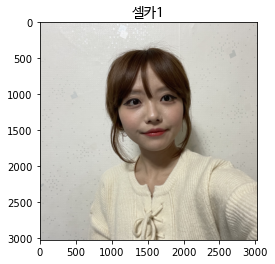

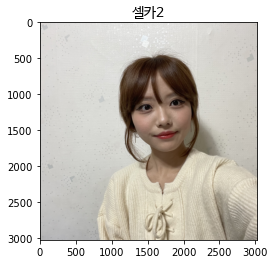

In [1]:
import os
from PIL import Image
import face_recognition
import cv2
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import re
%matplotlib inline

img_path = os.getenv('HOME')+'/aiffel/exploration/face_embedding/'    # 이미지 경로
my_img_list = os.listdir(img_path + "my_img/")    # 이미지 리스트
my_img_list.sort()

                     
print ("my_img_list: {}".format(my_img_list))    # 내 사진 파일이름 출력

fontprop = fm.FontProperties(fname = os.getenv('HOME')+'/aiffel/fonts/NanumBarunGothic.ttf', size=14)    # 폰트설정

# 내 사진 출력하기
for img in my_img_list:
    img_bgr = cv2.imread(img_path + "my_img/" + img, 1)    # openCV로 이미지 읽기, 1 : 컬러로 읽음
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)    # maplotlib 로 출력하기 위해 이미지 채널을 RGB 순으로 바꾸기
    
    title_name = re.sub("[.a-zA-Z]", "", img)
    plt.imshow(img_rgb)
    plt.title(title_name, fontproperties = fontprop)
    plt.show()


### (2) 비교할 연예인 사진 모으기
- 연예인 사진을 5장 이상 포함합니다.  
> 닮은 연예인 : 하연수, 주은(다이아), 유라(걸스데이)
안닮은 연예인 : 다현(트와이스), 예지(itzy), 서현진

others_img_list: ['다현.jpg', '서현진.jpg', '예지.jpg', '유라.jpg', '주은.jpg', '하연수.jpg']


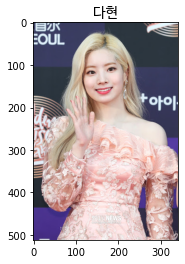

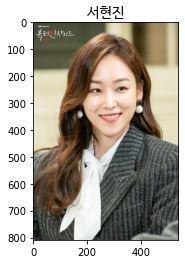

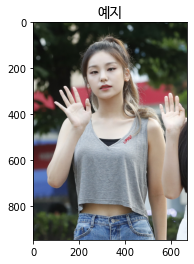

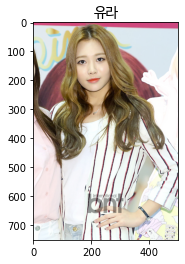

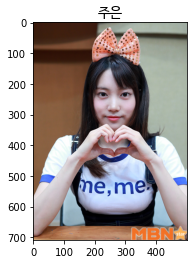

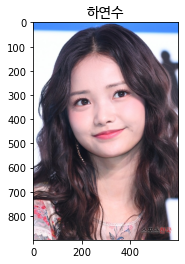

In [2]:
others_img_list = os.listdir(img_path + "others_img/")    # 이미지 리스트
others_img_list.sort()

print ("others_img_list: {}".format(others_img_list))    # 연예인 사진 파일이름 출력

# 연예인 사진 출력하기
for img in others_img_list:
    img_bgr = cv2.imread(img_path + "others_img/" + img, 1)    # openCV로 이미지 읽기, 1 : 컬러로 읽음
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)    # maplotlib 로 출력하기 위해 이미지 채널을 RGB 순으로 바꾸기
    
    title_name = re.sub("[.a-zA-Z]", "", img)
    plt.imshow(img_rgb)
    plt.title(title_name, fontproperties = fontprop)
    plt.show()


## Step2. 얼굴 영역 자르기
임베딩 추출을 위해서 얼굴 영역을 잘라줍니다. 
> 얼굴 영역 자르기 : **get_cropped_face(image_file)** 

>  자른 이미지 저장하기: **Image.fromarray(cropped_face).save(path_to_save)**

============================== 내 얼굴 영역 ==============================


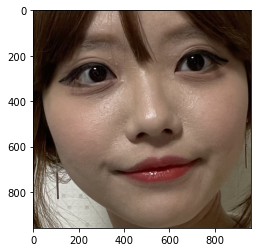

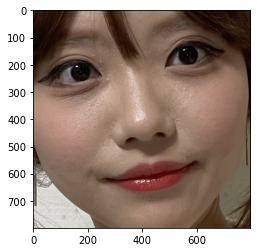

============================= 연예인 얼굴 영역 =============================


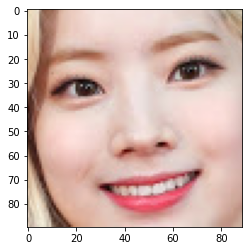

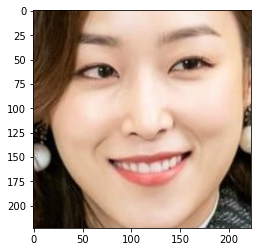

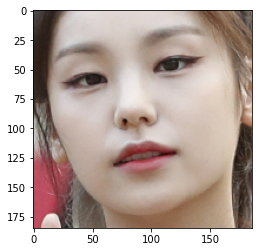

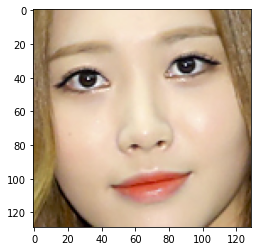

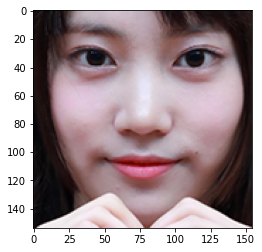

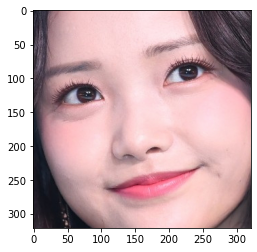

In [3]:
import face_recognition
import os
from PIL import Image

def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]

    return cropped_face

# 내 사진 출력하기
print("============================== 내 얼굴 영역 ==============================")
for img in my_img_list:
    cropped_face = get_cropped_face(img_path + "my_img/" + img)
    
    # 자른 이미지 출력
    plt.imshow(cropped_face)
    plt.show()
    
    # 자른 이미지 저장
    pillow_image = Image.fromarray(cropped_face)    
    pillow_image.save(img_path + "my_cropped_img/" + os.path.splitext(img)[0] + ".jpg")
    
# 연예인 사진 출력하기    
print("============================= 연예인 얼굴 영역 =============================")
for img in others_img_list:
    cropped_face = get_cropped_face(img_path + "others_img/" + img)
    
    # 자른 이미지 출력
    plt.imshow(cropped_face)
    plt.show()
    
    # 자른 이미지 저장
    pillow_image = Image.fromarray(cropped_face)
    pillow_image.save(img_path + "others_cropped_img/" + os.path.splitext(img)[0] + ".jpg")


## Step3. 얼굴 영역의 임베딩 추출하기
잘린 이미지를 통해 임베딩을 추출합니다. 나의 임베딩과 연예인의 임베딩은 구분할 수 있게 따로 저장합니다.
> **face_recognition.face_encodings(cropped_face)**

In [4]:
# 사진 벡터화하기

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

# 파일리스트에 있는 것 딕셔너리로 만들어서 벡터화 하기

def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    file_list.sort()
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:
          # 이미지 파일명에서 확장자를 제거한 이름
          embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        
    return embedding_dict

# 내 사진 임베딩
my_embedding_dict = get_face_embedding_dict(img_path + "my_cropped_img/")

# 연예인 사진 임베딩
others_embedding_dict = get_face_embedding_dict(img_path + "others_cropped_img/")
    
my_embedding_dict.update(others_embedding_dict) 
embedding_dict = my_embedding_dict.copy()

for key, value in embedding_dict.items():
    print(key)
    print(f": {value}")

셀카1
: [-0.09467673  0.02580981  0.01458857 -0.10282036 -0.13524026 -0.06800696
 -0.08271223 -0.07395586  0.14419098 -0.17653061  0.16301586 -0.05914171
 -0.14006522 -0.05847717 -0.04184101  0.24986459 -0.21546224 -0.17669006
 -0.05425685  0.03549063  0.11000101 -0.00252627  0.00740241  0.05454984
 -0.09514121 -0.33538201 -0.10670483 -0.05615696 -0.01583039 -0.05852631
  0.0008638   0.08600888 -0.17034867  0.00155517  0.02472987  0.12518074
 -0.00208876 -0.09177347  0.13548167  0.04060503 -0.33701399  0.05291235
  0.05761044  0.22193961  0.1960126  -0.01757567  0.04235175 -0.14642772
  0.13666786 -0.17666824 -0.00829282  0.10145359  0.04826673  0.04418154
  0.05329739 -0.10358971  0.08907441  0.13921285 -0.14100261  0.02680678
  0.10140868 -0.07946187  0.01316076 -0.10556426  0.18874773  0.06461442
 -0.12121028 -0.21804194  0.0924764  -0.14780332 -0.09289473  0.13821711
 -0.16311125 -0.1920031  -0.32467306 -0.05520442  0.37721887  0.10130966
 -0.14101951  0.06233485  0.02544646 -0.00247

In [5]:
import numpy as np

# 두 사람의 얼굴 임베딩 사이의 거리(L2 distance)를 구하는 형태입니다.
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

my = list(embedding_dict.keys())[0]
others = list(embedding_dict.keys())[1:]

sort_key_func = get_sort_key_func(my)   
print(f"{others[0]} : {sort_key_func(others[0])}")
print(f"{others[1]} : {sort_key_func(others[1])}")
print(f"{others[2]} : {sort_key_func(others[2])}")
print(f"{others[3]} : {sort_key_func(others[3])}")
print(f"{others[4]} : {sort_key_func(others[4])}")
print(f"{others[5]} : {sort_key_func(others[5])}")
print(f"{others[6]} : {sort_key_func(others[6])}")
#sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

셀카2 : 0.15322379067854872
다현 : 0.42110244268167035
서현진 : 0.47000967404625854
예지 : 0.45759180627320645
유라 : 0.3526934567049866
주은 : 0.3555298404938026
하연수 : 0.350978754367562


## Step4. 모은 연예인들과 비교하기
모은 연예인 사진들과 자신의 얼굴 사진에서 추출한 임베딩 벡터들 간의 거리를 비교해 봅니다.
### (1) 얼굴 임베딩 사이의 거리 측정하기
나의 임베딩과 연예인의 임베딩 사이의 거리는 L2 distance로 계산합니다.
> **np.linalg.norm(나의 임베딩 - 연예인의 임베딩, ord=2)**

In [6]:
import numpy as np

# 두 사람의 얼굴 임베딩 사이의 거리(L2 distance)를 구하는 형태입니다.
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1


### (2) 가장 닮은꼴 연예인 찾아보기
위에서 구현한 코드를 바탕으로 나와 닮은 연예인을 순서대로 찾아봅니다. 

In [7]:
def get_nearest_face(name, top=7):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : {}, 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
      
    return sorted_faces
            
# 나와 가장 닮은 사람은 누굴까요?
sorted_faces = get_nearest_face(my)


순위 1 : 셀카2, 거리(0.15322379067854872)
순위 2 : 하연수, 거리(0.350978754367562)
순위 3 : 유라, 거리(0.3526934567049866)
순위 4 : 주은, 거리(0.3555298404938026)
순위 5 : 다현, 거리(0.42110244268167035)
순위 6 : 예지, 거리(0.45759180627320645)
순위 7 : 서현진, 거리(0.47000967404625854)


## Step5. 다양한 재미있는 시각화 시도해보기
step2 단계에서 저장한 자른 이미지사진을 활용하여 재미있는 시각화를 시도해봅니다.  

In [79]:
import cv2 as cv

my_img = sorted_faces[0]
others_img = sorted_faces[2:]

img1 = cv.imread(img_path + "my_cropped_img/" + my_img[0] + ".jpg")
img1 = cv.resize(img1, (300, 300))

for img in others_img:
    a = 0.0
    img2 = cv.imread(img_path + "others_cropped_img/" + img[0] + ".jpg")
    img2 = cv.resize(img2, (300, 300))
    
    for i in range(10):  
        b = 1.0 - a
        dst = cv.addWeighted(img2, a, img1, b, 0)
        cv2.imwrite(img_path + "img_gif/temp/" + str(i) + ".jpg", dst)
        a = a + 0.1
        
    os.system('convert -delay 25 -loop 0 {}img_gif/temp/*.jpg {}img_gif/{}.gif'.format(img_path, img_path, img[0]))


**당신과 가장 닮은 유명인은 ...**  
## 하연수
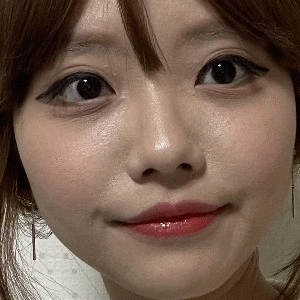  
</br>  
</br>  

**당신과 가장 닮은 유명인은 ...**  
## 걸스데이 유라
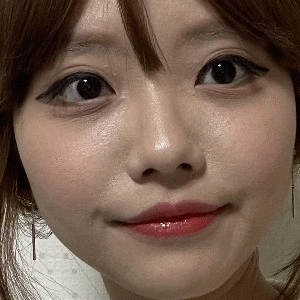  
</br>  
</br>  

**당신과 가장 닮은 유명인은 ...**  
## 다이아 주은
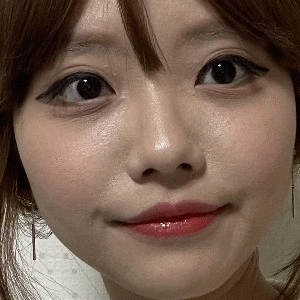  
</br>  
</br>  

## [ 결과 - 루브릭 ]
1. 얼굴임베딩 벡터를 활용해 가장 닮은 연예인 Best 5를 구할 수 있다.  

닮은꼴 순위, 이름, 임베딩 거리를 포함한 Top-5 리스트가 정렬되어 출력되었다.  
2. 충분한 수의 이미지에 대한 시도를 통해 매우 닮은꼴의 연예인을 찾아냈다.  

다양한 탐색을 통해 본인과 임베딩 거리 0.5 이내로 닮은 연예인을 찾아냈다.  
3. 다양하고 재미있는 결과 시각화를 시도하였다.  

matplotlib 등 다양한 시각화 도구를 하나 이상 이용해 재미있는 결과 시각화를 구현하였다.  

## [ 느낀점 ]